In [2]:
# Import the modules

import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep') 
import matplotlib.style as style
style.use('fivethirtyeight')


from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

# Data Scaler
from sklearn.preprocessing import StandardScaler

# Regression
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

# Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [3]:
data = pd.read_csv('nyc-rolling-sales.csv')

In [4]:
data.head(20)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [6]:
# Renaming data

data['BOROUGH'][data['BOROUGH'] == 1] = 'Manhattan'
data['BOROUGH'][data['BOROUGH'] == 2] = 'Bronx'
data['BOROUGH'][data['BOROUGH'] == 3] = 'Brooklyn'
data['BOROUGH'][data['BOROUGH'] == 4] = 'Queens'
data['BOROUGH'][data['BOROUGH'] == 5] = 'Staten Island'

In [7]:
pd.set_option('display.max_columns',999)
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [8]:
del data['EASE-MENT']

del data['Unnamed: 0']

In [9]:
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [10]:
# SALE PRICE is in object form but should be numeric

data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'], errors='coerce')

#LAND and GROSS SQUARE FEET is in object form as well but should be numeric

data['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'], errors='coerce')
data['GROSS SQUARE FEET']= pd.to_numeric(data['GROSS SQUARE FEET'], errors='coerce')

#SALE DATE is object but should be datetime

data['SALE DATE'] = pd.to_datetime(data['SALE DATE'], errors='coerce')

# Both TAX CLASS attributes should be categorical

data['TAX CLASS AT TIME OF SALE'] = data['TAX CLASS AT TIME OF SALE'].astype('category')

data['TAX CLASS AT PRESENT'] = data['TAX CLASS AT PRESENT'].astype('category')


In [11]:
sum(data.duplicated(data.columns))

765

In [12]:
# Delete the duplicates and check that it worked

data = data.drop_duplicates(data.columns, keep='last')
sum(data.duplicated(data.columns))

0

In [13]:
# Check number of rows and columns

data.shape

(83783, 20)

In [14]:
# Get high-level overview of the datatypes

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         83783 non-null  object        
 1   NEIGHBORHOOD                    83783 non-null  object        
 2   BUILDING CLASS CATEGORY         83783 non-null  object        
 3   TAX CLASS AT PRESENT            83783 non-null  category      
 4   BLOCK                           83783 non-null  int64         
 5   LOT                             83783 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83783 non-null  object        
 7   ADDRESS                         83783 non-null  object        
 8   APARTMENT NUMBER                83783 non-null  object        
 9   ZIP CODE                        83783 non-null  int64         
 10  RESIDENTIAL UNITS               83783 non-null  int64         
 11  CO

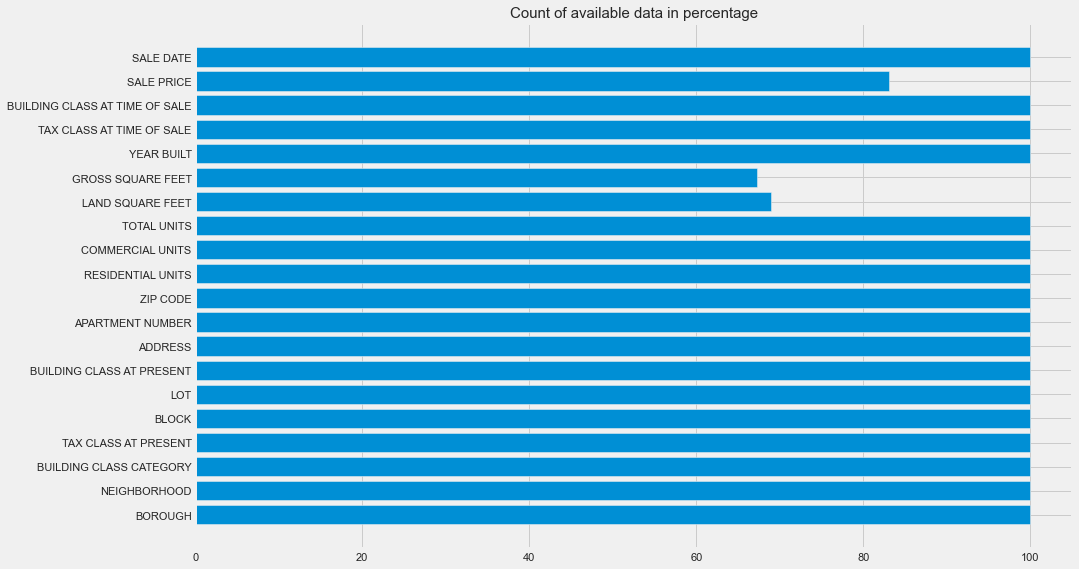

In [15]:
# Now let's show this visually which is more intuitive. First we'll capture the necessary data

variables = data.columns

count = []

for variable in variables:
    length = data[variable].count()
    count.append(length)

count_pct = np.round(100 * pd.Series(count) / len(data), 2)

#Plot number of available data per variable
plt.figure(figsize=(14,9))
plt.barh(variables, count_pct)
plt.title('Count of available data in percentage', fontsize=15)
plt.show()

In [16]:
# Remove observations with missing SALE PRICE
data = data[data['SALE PRICE'].notnull()]
len(data)

69607

In [17]:
data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,4.844900e+04,4.790000e+04,69607.000000,6.960700e+04
mean,4199.890140,374.580473,10741.159323,1.875070,0.164121,2.059319,3.544802e+03,3.528707e+03,1799.852184,1.280703e+06
std,3431.897518,656.232024,1264.804508,14.291398,8.997236,16.992716,3.973875e+04,2.920564e+04,520.099311,1.143036e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1350.000000,22.000000,10306.000000,0.000000,0.000000,0.000000,1.425000e+03,8.160000e+02,1920.000000,2.300000e+05
50%,3378.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.150000e+03,1.620000e+03,1938.000000,5.330000e+05
75%,6192.000000,820.000000,11249.000000,2.000000,0.000000,2.000000,3.100000e+03,2.508000e+03,1965.000000,9.500000e+05
max,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09


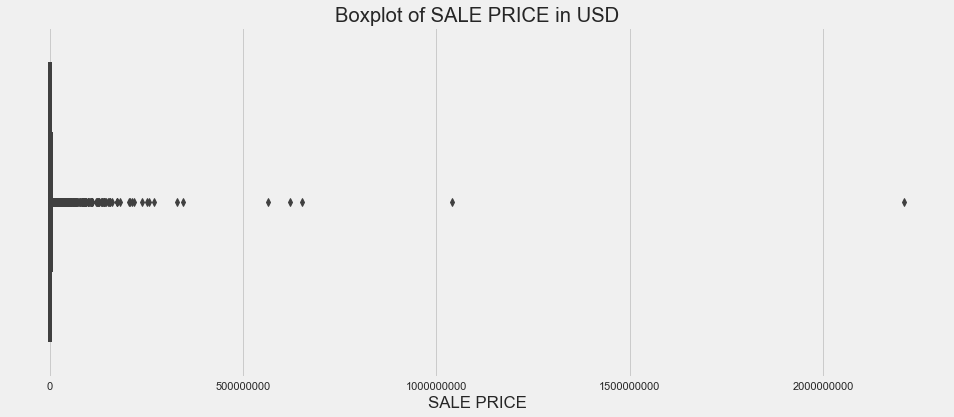

In [18]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='SALE PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

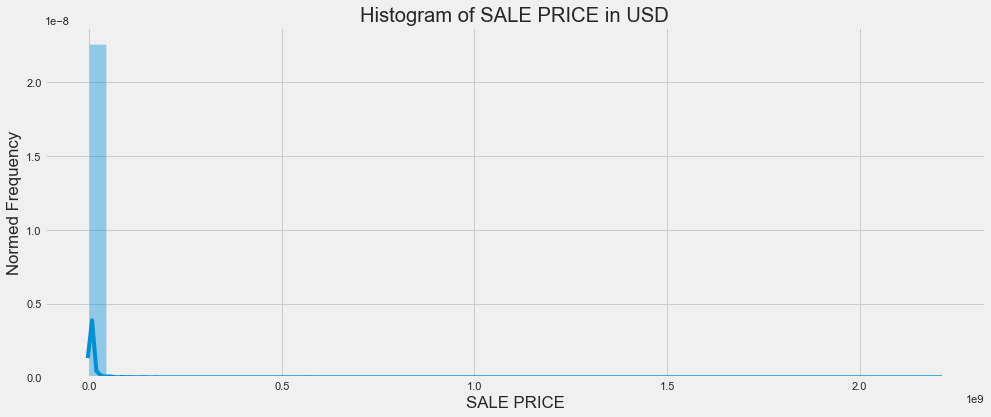

In [19]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.distplot(data['SALE PRICE'])
plt.title('Histogram of SALE PRICE in USD')
plt.ylabel('Normed Frequency')
plt.show()

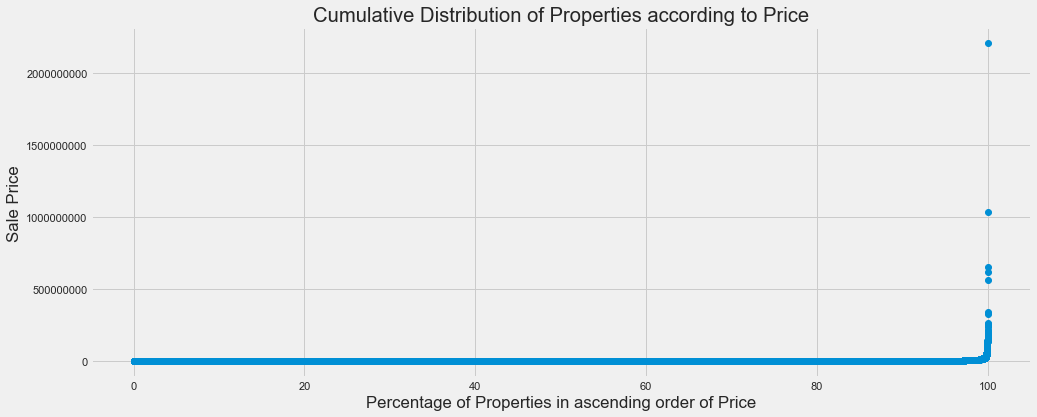

In [20]:
#Set the size of the plot
plt.figure(figsize=(15,6))

#Get the data and format it
x = data[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION'] = 1
x['PROPERTY PROPORTION'] = x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100* x['PROPERTY PROPORTION'] / len(x['PROPERTY PROPORTION'])

# Plot the data and configure the settings
plt.plot(x['PROPERTY PROPORTION'],x['SALE PRICE'], linestyle='None', marker='o')
plt.title('Cumulative Distribution of Properties according to Price')
plt.xlabel('Percentage of Properties in ascending order of Price')
plt.ylabel('Sale Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

What we see from the two graphs above is that there are a lot of outliers. Maybe this isn't all that surprising given that Manhattan is home to a lot of very expensive property. From the descriptive statistics we could also tell that 75% of the properties in this dataset are cheaper than 950,000 USD. There are also a fair number of properties cheaper than 100,000 USD, which seems too cheap in my opinion.

I have done a few iterations of what a good cap on sales prices is and settled for

1) property needs to be more expensive than 100,000 USD

2) property needs to be cheaper than 5,000,000 USD

Everything is else is a different animal and mixing all together in one model will decrease accuracy.

In [21]:
# Remove observations that fall outside those caps
data = data[(data['SALE PRICE'] > 100000) & (data['SALE PRICE'] < 5000000)]
len(data)

54579

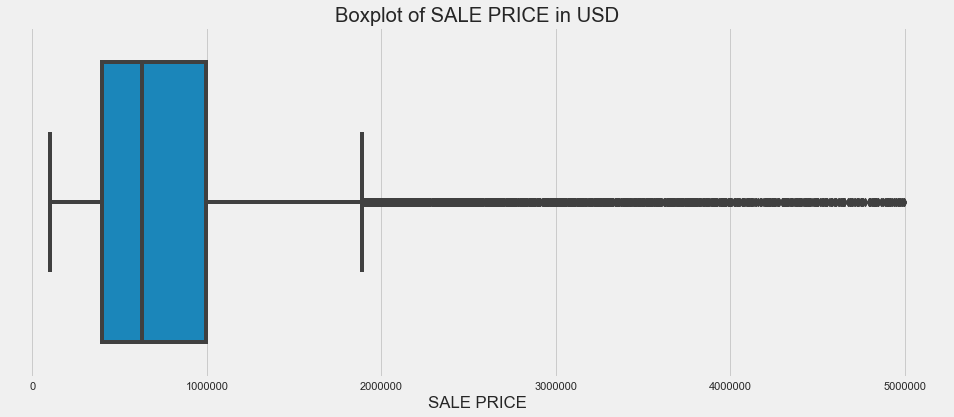

In [22]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='SALE PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

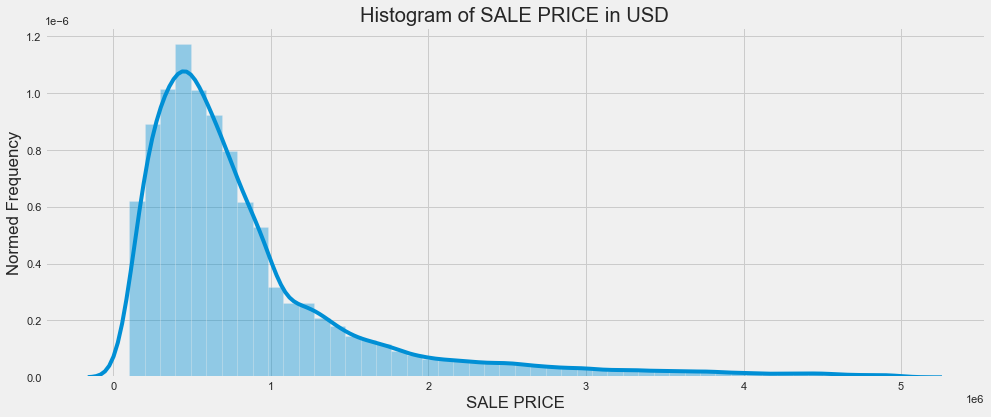

In [23]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.distplot(data['SALE PRICE'])
plt.title('Histogram of SALE PRICE in USD')
plt.ylabel('Normed Frequency')
plt.show()


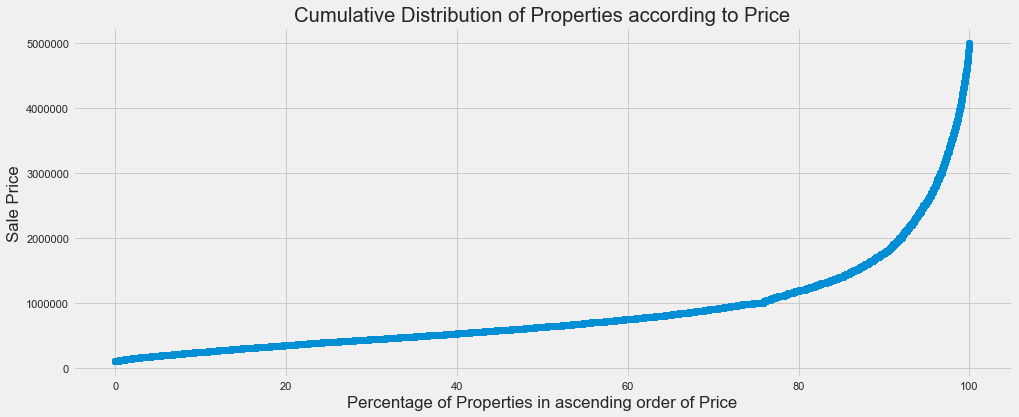

In [24]:
#Set the size of the plot
plt.figure(figsize=(15,6))

#Get the data and format it
x = data[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION'] = 1
x['PROPERTY PROPORTION'] = x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100* x['PROPERTY PROPORTION'] / len(x['PROPERTY PROPORTION'])

# Plot the data and configure the settings
plt.plot(x['PROPERTY PROPORTION'],x['SALE PRICE'], linestyle='None', marker='o')
plt.title('Cumulative Distribution of Properties according to Price')
plt.xlabel('Percentage of Properties in ascending order of Price')
plt.ylabel('Sale Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

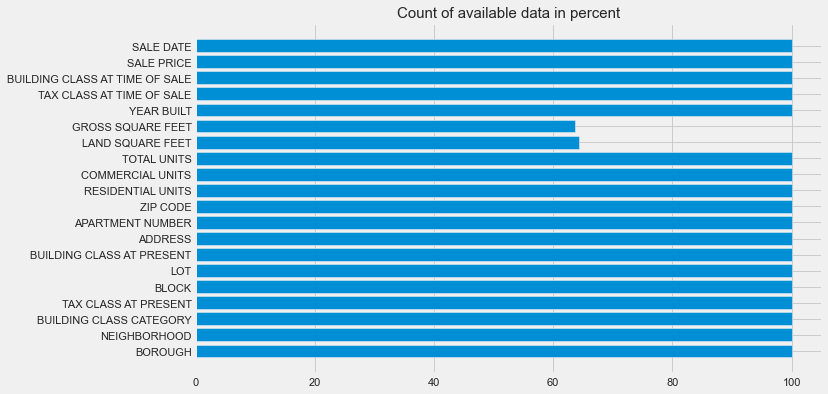

In [25]:
# Capture the necessary data
variables = data.columns

count = []

for variable in variables:
    length = data[variable].count()
    count.append(length)
    
count_pct = np.round(100 * pd.Series(count) / len(data), 2)


#Plot number of available data per variable
plt.figure(figsize=(10,6))
plt.barh(variables, count_pct)
plt.title('Count of available data in percent', fontsize=15)
plt.show()

In [26]:
# Removes all NULL values
data = data[data['LAND SQUARE FEET'].notnull()] 
data = data[data['GROSS SQUARE FEET'].notnull()] 

In [27]:
# Keeps properties with fewer than 20,000 Square Feet, which is about 2,000 Square Metres
data = data[data['GROSS SQUARE FEET'] < 20000]
data = data[data['LAND SQUARE FEET'] < 20000]

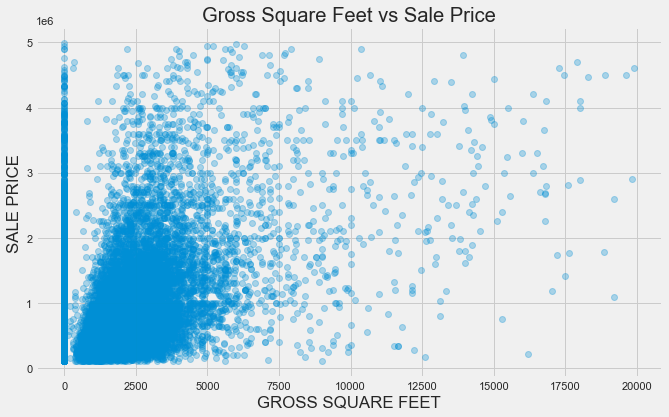

In [28]:
plt.figure(figsize=(10,6))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Gross Square Feet vs Sale Price')
plt.show()

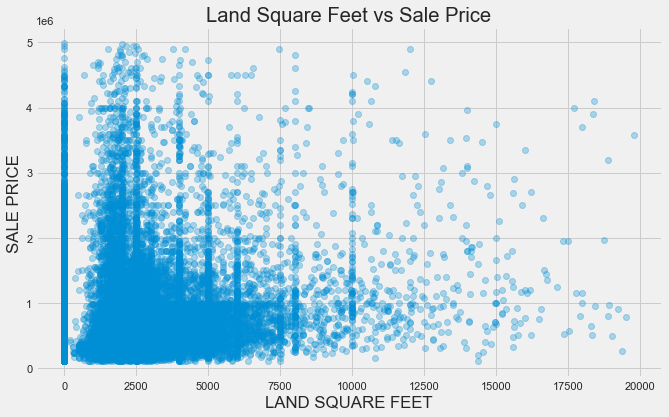

In [29]:
plt.figure(figsize=(10,6))
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Land Square Feet vs Sale Price')
plt.show()

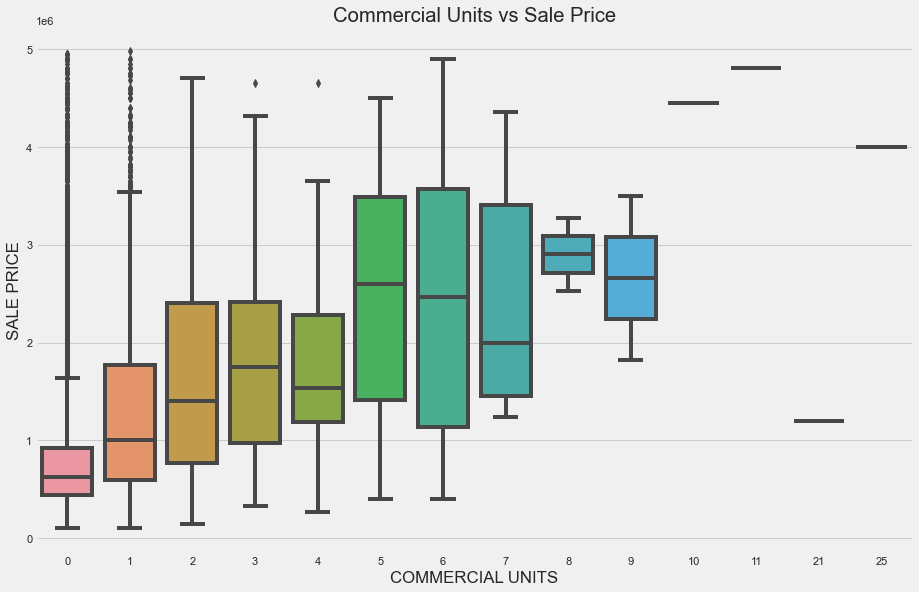

In [30]:
# Only a handful of properties with 0 total units are remaining and they will now be deleted
data = data[(data['TOTAL UNITS'] > 0) & (data['TOTAL UNITS'] < 50)] 

#Remove data where commercial + residential doesn't equal total units
data = data[data['TOTAL UNITS'] == data['COMMERCIAL UNITS'] + data['RESIDENTIAL UNITS']]

plt.figure(figsize=(14,9))
sns.boxplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=data)
plt.title('Commercial Units vs Sale Price')
plt.show()

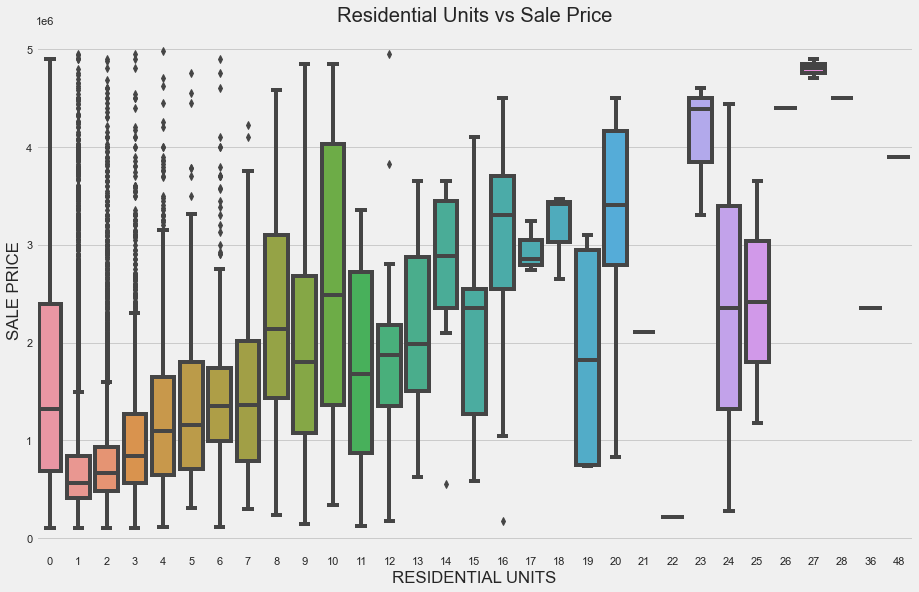

In [31]:
plt.figure(figsize=(14,9))
sns.boxplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=data)
plt.title('Residential Units vs Sale Price')
plt.show()

In [32]:
data = data[data['YEAR BUILT'] > 0]

In [33]:
data['BUILDING AGE'] = 2017 - data['YEAR BUILT']

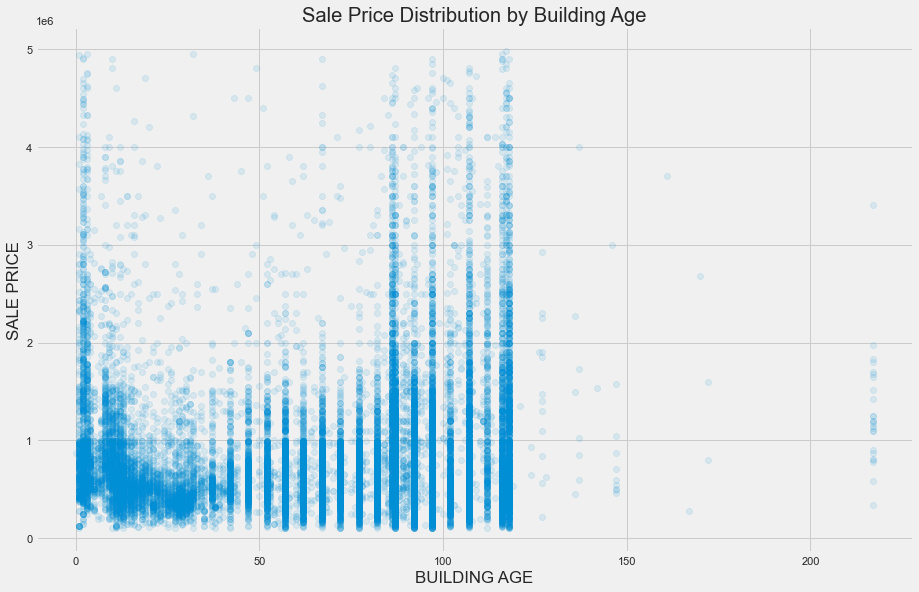

In [34]:
plt.figure(figsize=(14,9))
sns.regplot(x='BUILDING AGE', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.1})
plt.title('Sale Price Distribution by Building Age')
plt.show()

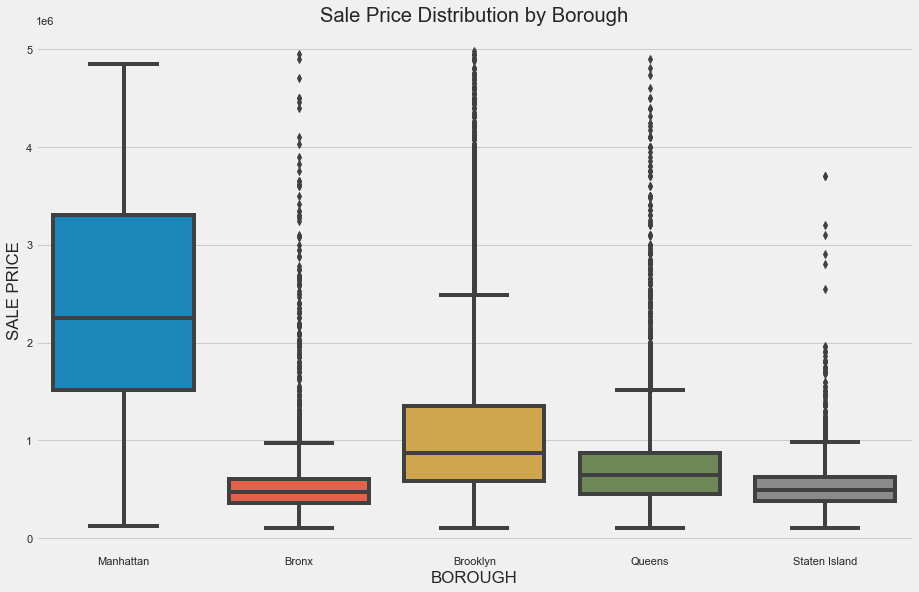

In [35]:
plt.figure(figsize=(14,9))
sns.boxplot(x='BOROUGH', y='SALE PRICE',data=data)
plt.title('Sale Price Distribution by Borough')
plt.show()

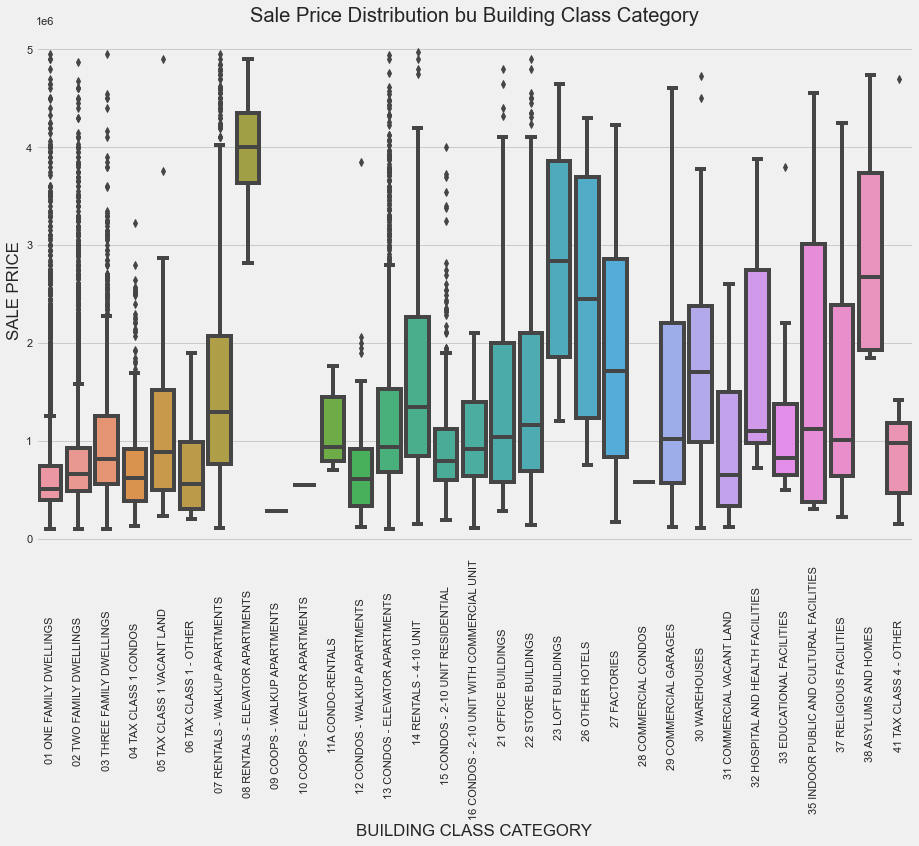

In [36]:
plt.figure(figsize=(14,9))
order = sorted(data['BUILDING CLASS CATEGORY'].unique())
sns.boxplot(x='BUILDING CLASS CATEGORY', y='SALE PRICE', data=data, order=order)
plt.xticks(rotation=90)
plt.title('Sale Price Distribution bu Building Class Category')
plt.show()

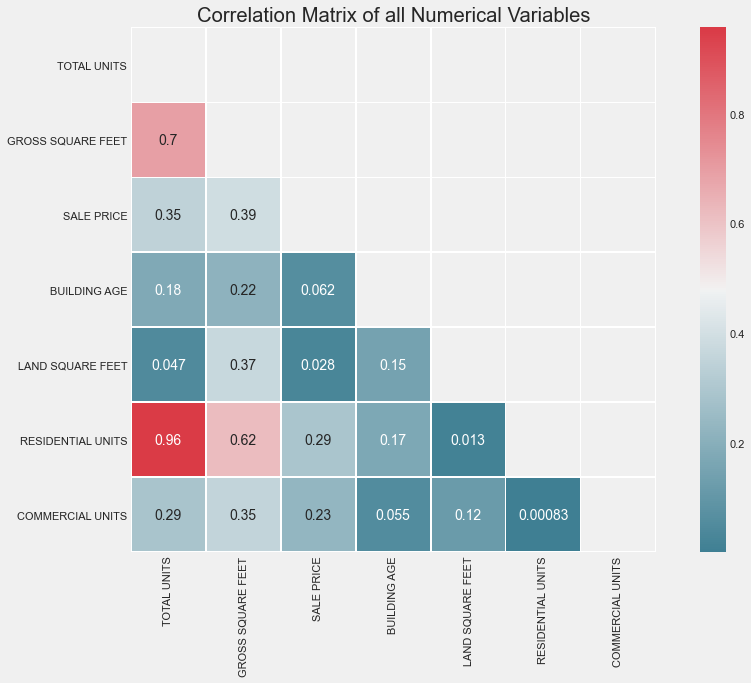

In [37]:
# Correlation Matrix

# Compute the correlation matrix

d= data[['TOTAL UNITS','GROSS SQUARE FEET','SALE PRICE','BUILDING AGE','LAND SQUARE FEET','RESIDENTIAL UNITS','COMMERCIAL UNITS']]

corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,
            square=True, linewidths=.5, annot=True, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()


## **Data Preparation**

scikit works best with normalized data, i.e. data that has a mean around 0 and a distribution around that. In the next section I will normalise/standardise the data and also take the log in order to get rid of the skewness and to allow for a more normal distribution.

But first I get all the relevant variables and one-hot encode the categrical variables, which is necessary for scikit to work. The numerical variables don't need one-hot encoding but will have to be normalised.

In [38]:
#Choose only the variables I want to use in the model

columns = ['BOROUGH', 'BUILDING CLASS CATEGORY', 'COMMERCIAL UNITS','GROSS SQUARE FEET',
       'SALE PRICE', 'BUILDING AGE', 'LAND SQUARE FEET', 'RESIDENTIAL UNITS']
data_model = data.loc[:,columns]

In [39]:
#Select the variables to be one-hot encoded
one_hot_features = ['BOROUGH', 'BUILDING CLASS CATEGORY']

# For each categorical column, find the unique number of categories. This tells us how many columns we are adding to the dataset.
longest_str = max(one_hot_features, key=len)
total_num_unique_categorical = 0
for feature in one_hot_features:
    num_unique = len(data[feature].unique())
    print('{col:<{fill_col}} : {num:d} unique categorical values.'.format(col=feature, 
                                                                          fill_col=len(longest_str),
                                                                          num=num_unique))
    total_num_unique_categorical += num_unique
print('{total:d} columns will be added during one-hot encoding.'.format(total=total_num_unique_categorical))

BOROUGH                 : 5 unique categorical values.
BUILDING CLASS CATEGORY : 31 unique categorical values.
36 columns will be added during one-hot encoding.


In [40]:
# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).
one_hot_encoded = pd.get_dummies(data_model[one_hot_features])
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29638 entries, 3 to 84545
Data columns (total 36 columns):
 #   Column                                                                Non-Null Count  Dtype
---  ------                                                                --------------  -----
 0   BOROUGH_Bronx                                                         29638 non-null  uint8
 1   BOROUGH_Brooklyn                                                      29638 non-null  uint8
 2   BOROUGH_Manhattan                                                     29638 non-null  uint8
 3   BOROUGH_Queens                                                        29638 non-null  uint8
 4   BOROUGH_Staten Island                                                 29638 non-null  uint8
 5   BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS                       29638 non-null  uint8
 6   BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS                       29638 non-null  uint8
 7   BUILDING CLAS

In [41]:
#Delete the old columns...
data_model = data_model.drop(one_hot_features, axis=1)

#...and add the new one-hot encoded variables
data_model = pd.concat([data_model, one_hot_encoded], axis=1)
data_model.head()

,COMMERCIAL UNITS,GROSS SQUARE FEET,SALE PRICE,BUILDING AGE,LAND SQUARE FEET,RESIDENTIAL UNITS,BOROUGH_Bronx,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island,BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS,BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND,BUILDING CLASS CATEGORY_06 TAX CLASS 1 - OTHER,BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_08 RENTALS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_09 COOPS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_10 COOPS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_11A CONDO-RENTALS,BUILDING CLASS CATEGORY_12 CONDOS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_13 CONDOS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_14 RENTALS - 4-10 UNIT,BUILDING CLASS CATEGORY_15 CONDOS - 2-10 UNIT RESIDENTIAL,BUILDING CLASS CATEGORY_16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT,BUILDING CLASS CATEGORY_21 OFFICE BUILDINGS,BUILDING CLASS CATEGORY_22 STORE BUILDINGS,BUILDING CLASS CATEGORY_23 LOFT BUILDINGS,BUILDING CLASS CATEGORY_26 OTHER HOTELS,BUILDING CLASS CATEGORY_27 FACTORIES,BUILDING CLASS CATEGORY_28 COMMERCIAL CONDOS,BUILDING CLASS CATEGORY_29 COMMERCIAL GARAGES,BUILDING CLASS CATEGORY_30 WAREHOUSES,BUILDING CLASS CATEGORY_31 COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER
3,0,6794.0,3936272.0,104,2272.0,10,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,4226.0,3192840.0,97,1750.0,8,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
172,1,3360.0,3300000.0,107,1520.0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174,1,3713.0,4750000.0,107,1779.0,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
195,1,3586.0,3700000.0,118,1218.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### **Transforming the dependent variable SALE PRICE**

This is what SALE PRICE looks before the transformation...

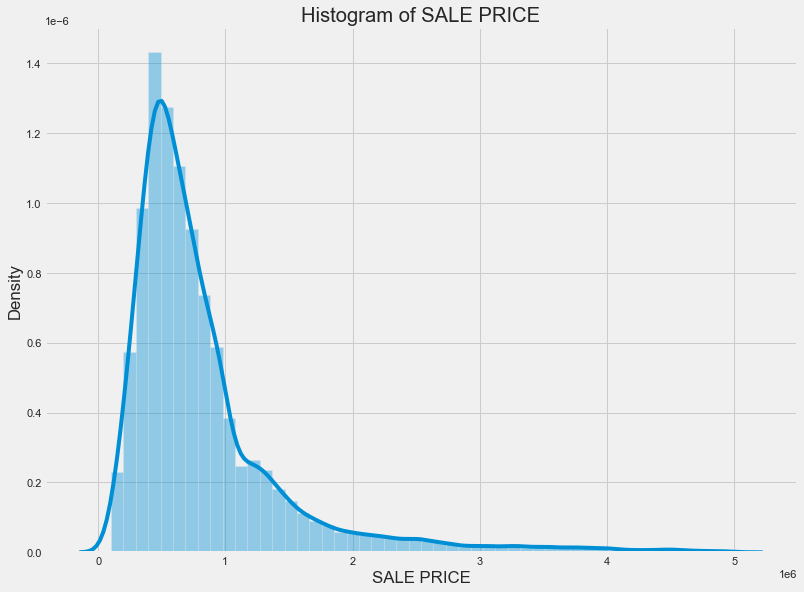

In [42]:
plt.figure(figsize=(12,9))
sns.distplot(data_model['SALE PRICE'])
plt.title('Histogram of SALE PRICE')
plt.show()


In [43]:
# Take the log and normalise
data_model['SALE PRICE'] = StandardScaler().fit_transform(np.log(data_model['SALE PRICE']).values.reshape(-1,1))

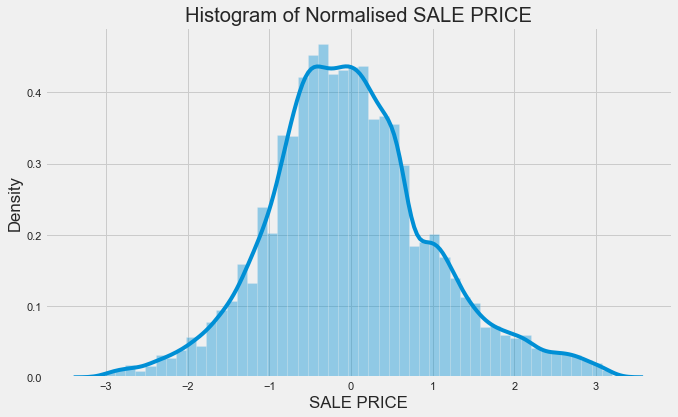

In [44]:
plt.figure(figsize=(10,6))
sns.distplot(data_model['SALE PRICE'])
plt.title('Histogram of Normalised SALE PRICE')
plt.show()

## **Transforming the independent variables**

Some of the variables contain zeroes, which is incompatible with a log graph (log of zero is undefined) hence we need to add 1 so that we can normalise it - you can see that in the table below. Using the log allows me to get rid of the skew in the data and have a more normal distribution. 

In [45]:
data_model.describe()


,COMMERCIAL UNITS,GROSS SQUARE FEET,SALE PRICE,BUILDING AGE,LAND SQUARE FEET,RESIDENTIAL UNITS,BOROUGH_Bronx,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island,BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS,BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND,BUILDING CLASS CATEGORY_06 TAX CLASS 1 - OTHER,BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_08 RENTALS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_09 COOPS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_10 COOPS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_11A CONDO-RENTALS,BUILDING CLASS CATEGORY_12 CONDOS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_13 CONDOS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_14 RENTALS - 4-10 UNIT,BUILDING CLASS CATEGORY_15 CONDOS - 2-10 UNIT RESIDENTIAL,BUILDING CLASS CATEGORY_16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT,BUILDING CLASS CATEGORY_21 OFFICE BUILDINGS,BUILDING CLASS CATEGORY_22 STORE BUILDINGS,BUILDING CLASS CATEGORY_23 LOFT BUILDINGS,BUILDING CLASS CATEGORY_26 OTHER HOTELS,BUILDING CLASS CATEGORY_27 FACTORIES,BUILDING CLASS CATEGORY_28 COMMERCIAL CONDOS,BUILDING CLASS CATEGORY_29 COMMERCIAL GARAGES,BUILDING CLASS CATEGORY_30 WAREHOUSES,BUILDING CLASS CATEGORY_31 COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER
count,29638.000000,29638.000000,2.963800e+04,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000,29638.000000
mean,0.086949,1930.882347,-9.206033e-17,70.616135,2723.698326,1.727175,0.113031,0.364498,0.009414,0.351542,0.161516,0.415919,0.321074,0.075477,0.012416,0.000810,0.000236,0.044369,0.000236,0.000034,0.000034,0.000270,0.007996,0.060632,0.009582,0.022167,0.000405,0.003846,0.011472,0.000135,0.000135,0.002092,0.000034,0.004251,0.003610,0.000169,0.000304,0.000405,0.000270,0.001215,0.000135,0.000270
std,0.455198,1524.886820,1.000017e+00,34.974586,1926.963113,1.518719,0.316636,0.481297,0.096568,0.477460,0.368012,0.492888,0.466897,0.264165,0.110737,0.028445,0.015367,0.205916,0.015367,0.005809,0.005809,0.016427,0.089066,0.238657,0.097421,0.147231,0.020118,0.061901,0.106492,0.011617,0.011617,0.045690,0.005809,0.065064,0.059978,0.012988,0.017424,0.020118,0.016427,0.034831,0.011617,0.016427
min,0.000000,0.000000,-3.013746e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1216.000000,-6.303558e-01,52.000000,1832.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1680.000000,-5.826635e-02,82.000000,2417.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [46]:
# Add 1 to Units
data_model['COMMERCIAL UNITS'] = data_model['COMMERCIAL UNITS'] + 1
data_model['RESIDENTIAL UNITS'] = data_model['RESIDENTIAL UNITS'] + 1

data_model['GROSS SQUARE FEET'] = data_model['GROSS SQUARE FEET'] + 1
data_model['LAND SQUARE FEET'] = data_model['LAND SQUARE FEET'] + 1

data_model['BUILDING AGE'] = data_model['BUILDING AGE'] + 1


# Take the log and standardise
data_model['COMMERCIAL UNITS'] = StandardScaler().fit_transform(np.log(data_model['COMMERCIAL UNITS']).values.reshape(-1,1))
data_model['RESIDENTIAL UNITS'] = StandardScaler().fit_transform(np.log(data_model['RESIDENTIAL UNITS']).values.reshape(-1,1))
data_model['GROSS SQUARE FEET'] = StandardScaler().fit_transform(np.log(data_model['GROSS SQUARE FEET']).values.reshape(-1,1))
data_model['LAND SQUARE FEET'] = StandardScaler().fit_transform(np.log(data_model['LAND SQUARE FEET']).values.reshape(-1,1))
data_model['BUILDING AGE'] = StandardScaler().fit_transform(np.log(data_model['BUILDING AGE']).values.reshape(-1,1))



In [47]:
#Split data into training and testing set with 80% of the data going into training
training, testing = train_test_split(data_model, test_size=0.2, random_state=0)
print("Total sample size = %i; training sample size = %i, testing sample size = %i"\
     %(data_model.shape[0],training.shape[0],testing.shape[0]))

Total sample size = 29638; training sample size = 23710, testing sample size = 5928


In [48]:
#X are the variables/features that help predict y, which tells us whether an employee left or stayed. This is done for both 
#training and testing

df_train_s = training.loc[:,data_model.columns]
X_train_s = df_train_s.drop(['SALE PRICE'], axis=1)
y_train_s = df_train_s.loc[:, ['SALE PRICE']]

df_test_s = testing.loc[:,data_model.columns]
X_test_s = df_test_s.drop(['SALE PRICE'], axis=1)
y_test_s = df_test_s.loc[:, ['SALE PRICE']]

In [49]:
# Create the regressor: linreg
linreg = LinearRegression()

# Fit the regressor to the training data
linreg.fit(X_train_s, y_train_s)

# Predict the labels of the test set: y_pred
y_pred_s = linreg.predict(X_test_s)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_linreg = cross_val_score(linreg, X_train_s, y_train_s, cv=5)

In [50]:
print("R^2: {}".format(linreg.score(X_test_s, y_test_s)))
rmse = np.sqrt(mean_squared_error(y_test_s, y_pred_s))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_linreg)))
# Print the 5-fold cross-validation scores
print(cv_scores_linreg)

R^2: 0.363235389600268
Root Mean Squared Error: 0.8088975943993005
Average 5-Fold CV Score: 0.3521580728162329
[0.3539045  0.36669194 0.34626091 0.35177117 0.34216184]


In [51]:
#Random Forest

rf_reg = RandomForestRegressor()

rf_reg.fit(X_train_s, y_train_s)

y_pred_s_rf = rf_reg.predict(X_test_s)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_rf = cross_val_score(rf_reg, X_train_s, y_train_s, cv=5)

In [52]:
print("R^2: {}".format(rf_reg.score(X_test_s, y_test_s)))
rmse = np.sqrt(mean_squared_error(y_test_s, y_pred_s_rf))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_rf)))
# Print the 5-fold cross-validation scores
print(cv_scores_rf)

R^2: 0.43364744449281056
Root Mean Squared Error: 0.7628646957221824
Average 5-Fold CV Score: 0.4195984259411885
[0.42588283 0.46226855 0.39590693 0.41354358 0.40039025]


In [53]:
# Feature importance of Random Forest

importance = pd.DataFrame(list(zip(X_train_s.columns, np.transpose(rf_reg.feature_importances_))) \
            ).sort_values(1, ascending=False)
importance

,0,1
1,GROSS SQUARE FEET,0.409459
3,LAND SQUARE FEET,0.188094
2,BUILDING AGE,0.144990
6,BOROUGH_Brooklyn,0.085984
5,BOROUGH_Bronx,0.034997
8,BOROUGH_Queens,0.025665
4,RESIDENTIAL UNITS,0.025046
22,BUILDING CLASS CATEGORY_13 CONDOS - ELEVATOR A...,0.017154
7,BOROUGH_Manhattan,0.011086
9,BOROUGH_Staten Island,0.009046


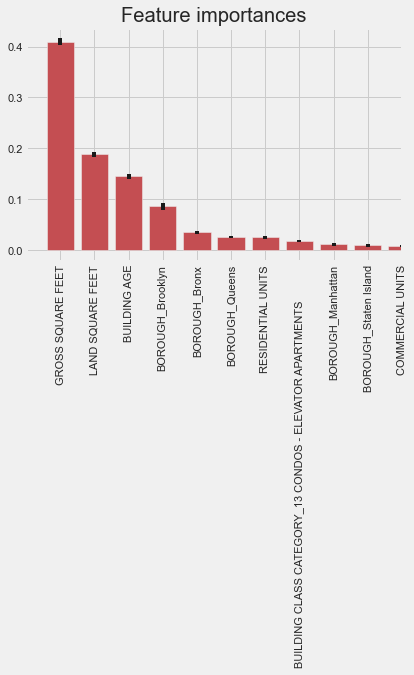

In [54]:
importances = rf_reg.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf_reg.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_s.shape[1]), importances[indices],  
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_s.shape[1]),X_train_s.columns[indices], rotation=90)
#plt.xlim([-1, X_train_s.shape[1]])
plt.xlim([-1, 10])
plt.show()

In [55]:
#Ridge Regression

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

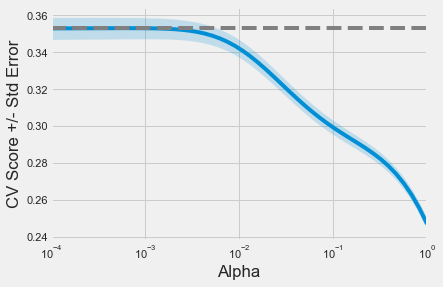

In [56]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X_train_s, y_train_s, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

In [57]:
# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.01, normalize=True)

#Fit the model
ridge.fit(X_train_s, y_train_s)

#Predict
y_pred_s_ridge = ridge.predict(X_test_s)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X_train_s, y_train_s, cv=5)

In [58]:
print("R^2: {}".format(ridge.score(X_test_s, y_test_s)))
rmse = np.sqrt(mean_squared_error(y_test_s, y_pred_s_ridge))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(ridge_cv)))
# Print the 5-fold cross-validation scores
print(ridge_cv)

R^2: 0.3523035334356712
Root Mean Squared Error: 0.8158115478900659
Average 5-Fold CV Score: 0.3418700139000195
[0.34620226 0.36076913 0.32985064 0.34248812 0.33003992]


In [59]:
#ElasticNet and GridSearch

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train_s, y_train_s)

# Predict on the test set and compute metrics
y_pred_elas = gm_cv.predict(X_test_s)
r2 = gm_cv.score(X_test_s, y_test_s)
mse = mean_squared_error(y_test_s, y_pred_elas)

In [60]:
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.1426750882209621
Tuned ElasticNet MSE: 0.8809547724719723
